In [217]:
from PIL import Image, ImageDraw

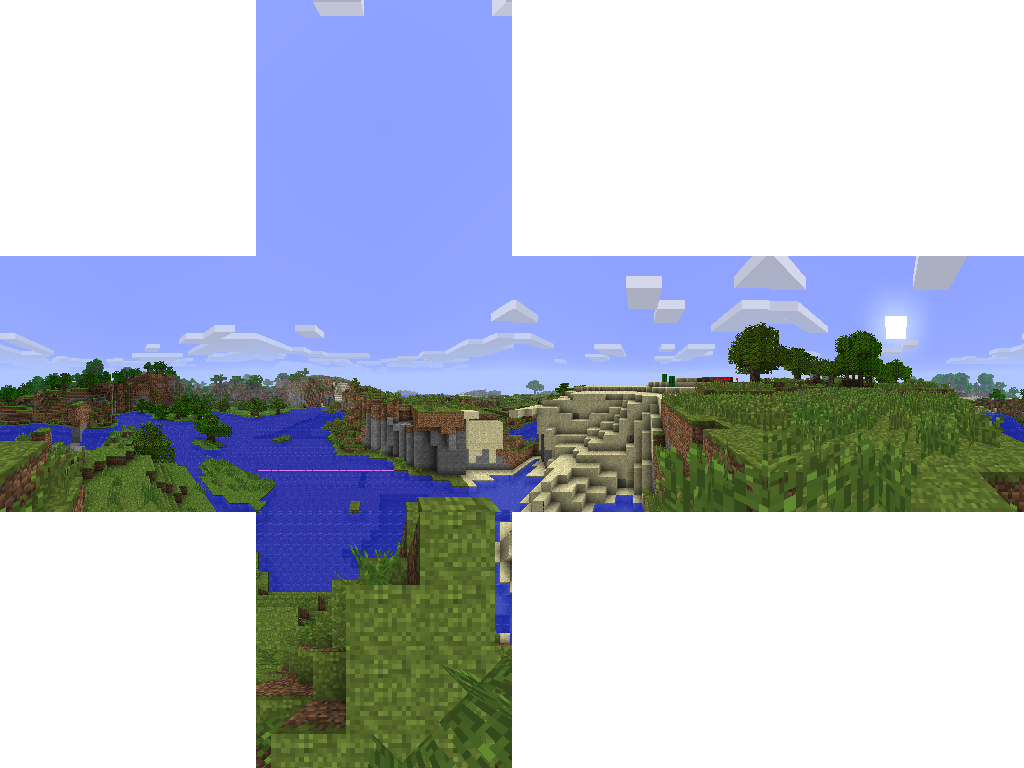

In [218]:
im = Image.open("src.png")
draw = ImageDraw.Draw(im) 
im

In [239]:
# origin block

originx=-9
originy=94
originz=93

# magic
h1=1.7
m1=127.5

def calcPos(x,z,y):
    return [originx+x,originy-y,originz+z]


In [234]:
# helper funtions
# todo: better naming
def drawX(draw,x,y):
    pxl = 640-(x+0.24)/(y+h1)*m1
    color = ['red','orange','yellow','green','blue','purple'][y%6]
    if pxl<256*3 and pxl>256*2:
        draw.line((1*256-1,pxl, 2*256-1,pxl), fill=color)
def drawZ(draw,z,y):
    pxl = (z-0.01)/(y+h1)*m1+384
    color = ['red','orange','yellow','green','blue','purple'][y%6]
    if pxl<256*2 and pxl>256:
        draw.line((pxl,3*256-1, pxl,2*256-1), fill=color)
def drawBlock(draw,x,z,y):
    drawX(draw,x-0.5,y+1)
    drawX(draw,x+0.5,y+1)
    drawZ(draw,z-0.5,y+1)
    drawZ(draw,z+0.5,y+1)
    drawX(draw,x-0.5,y)
    drawX(draw,x+0.5,y)
    drawZ(draw,z-0.5,y)
    drawZ(draw,z+0.5,y)

# use this function:
def block(draw,x,y,z):
    drawBlock(draw,x-originx,z-originz,originy-y)

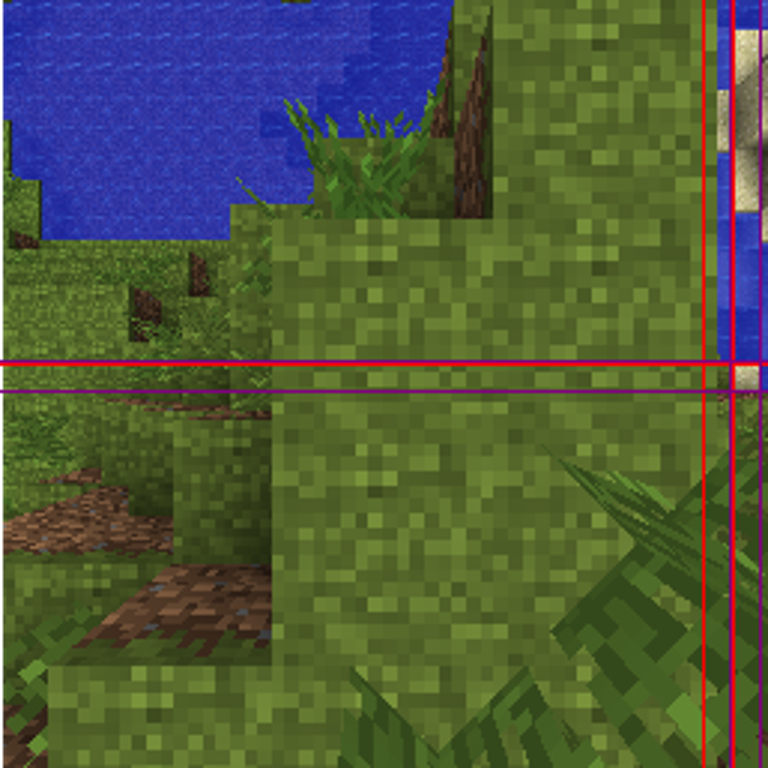

In [243]:
im = Image.open("src.png")
draw = ImageDraw.Draw(im) 

# x,y,z
block(draw,-9,83,105)

#ylvl = 1
#for i in range(40):
#    drawZ(draw,i-20.5,ylvl)
#    drawX(draw,i-20.5,ylvl)

# colors cycle through the rainbow
# make sure you look at the right color for the right y-level
# red above orange, then yellow, etc.
# e.g. if there's red and purple, purple is on top because of the cycle

im.crop([255,256*2,256*2,256*3]).resize((256*3,256*3))